# Sample code for exercise 1-1
## Schmidt decomposition of a random vector

2017 Aug. Tsuyoshi Okubo  
2018 Dec. modified  
2020 Nov. Modified and add appendix

In this code, you can simulate SVD (Schmidt decomposition) of a $m^N$ dimensional random vector.  
You can change   
- N: $N$
- m: $m$

In this example, these variables just mean the size of Hilbert space and there is no relation to physics, such as spin system. Note that if you consider an array of $N$ qubits, the dimension of a state vector of the system is $2^N$.

In the appendix, you can also check the volume law of the entanglement entropy for random vectors.


In [1]:
import numpy as np
import scipy.linalg as linalg
%matplotlib inline
from matplotlib import pyplot

In [2]:
## Define the vector dimension = m^N

N = 16          
m = 2         

An $m^N$ dimensional random vector is fistly transformed into a $m^{N/2} \times m^{N/2}$ matrix. Then we perform the singular value decomposition of it.

In [3]:
## make random complex vector
vec = (np.random.rand(m**N)-0.5) + 1.0j * (np.random.rand(m**N)-0.5)

## Make matrix from wave function
Mat = vec[:].reshape(m**(N//2),m**(N-N//2))

## SVD
s = linalg.svdvals(Mat)

The singular values are normalized as $\sum_i s_i^2 = 1$. Note that the squared sum of the singualr values is related to the norm of the vector as 
$$ \lVert \vec{v} \rVert = \sqrt{\mathrm{Tr}~{MM^T}} = \sqrt{\sum_i s_i^2}, $$
where $\vec{v}$ is the target vector and $M$ is its matrix form explained in the previous step.

Then the entanglement entropy is calculated as 
$$ S = -\sum_i s_i^2 \log s_i^2. $$

In [4]:
## Entanglement entropy
norm = np.sqrt(np.sum(s**2))
print("Norm of the vector = "+ repr(norm))

s /= norm
EE = -np.sum(s**2*np.log(s**2))
print("Entanglement entropy = " + repr(EE))

Norm of the vector = 104.56723347140382
Entanglement entropy = 5.048042102424752


Finally, we plot the singular value spectrum. Note that, in the case of a random vector, we expect the volume low of the entanglement entorpy. 
Corresponding to this fact, the singular values decrease slowly in the case of a random vector.

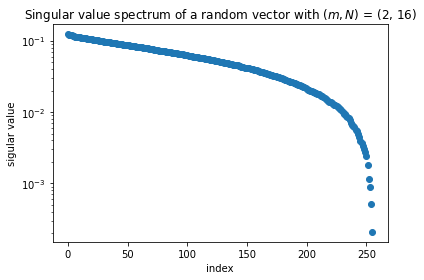

In [5]:
## plot singular values
pyplot.title("Singular value spectrum of a random vector with $(m, N)$ = ("+repr(m) +", "+repr(N)+")")
pyplot.plot(np.arange(m**(N//2),dtype=int),s,"o")
pyplot.xlabel("index")
pyplot.ylabel("sigular value")
pyplot.yscale("log")
pyplot.show()


## Appendix: Volume law of the entanglement entorpy
In the following section, you can check the volume low of the entanglement entropy for random vectors.

Here we use the same $m$ which used in main part and vary $N$ from N_min to N_max with N_step interval.

In [6]:
N_min = 4
N_max = 20
N_step = 2

N_list = np.arange(N_min,N_max+1,N_step,dtype=int)

Here we calculate the entanglement entropy for each $N$.

In [7]:
EE_list = []
for N in N_list:
    ## make random complex vector
    vec = (np.random.rand(m**N)-0.5) + 1.0j * (np.random.rand(m**N)-0.5)

    ## Make matrix from the vector
    Mat = vec[:].reshape(m**(N//2),m**(N-N//2))

    ## SVD
    s = linalg.svdvals(Mat)
    norm = np.sqrt(np.sum(s**2))
    

    s /= norm
    EE_list.append(-np.sum(s**2*np.log(s**2)))


Finally, we plot $N$ dependence of the entanglement entorpy. You can see the entanglement entropy linearly increases as we increase $N$.

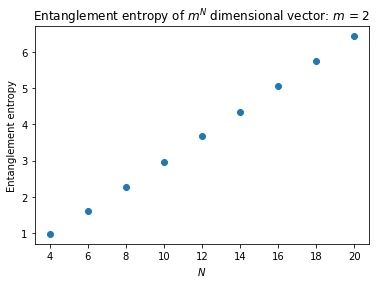

In [8]:
## plot of the entanglement entropy
pyplot.title("Entanglement entropy of $m^N$ dimensional vector: $m$ = "+repr(m))
pyplot.plot(N_list,EE_list,"o")
pyplot.xlabel("$N$")
pyplot.ylabel("Entanglement entropy")
pyplot.show()